# Imports

In [197]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\hms467\AppData\Local\Temp\ipykernel_16860\2613865418.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Setup

In [198]:
model = HANCModelClass(name='baseline')

In [199]:
par = model.par
ss = model.ss
path = model.path

# Find stationary equilibrium

In [200]:
model.find_ss(do_print=True)

### step 1: broad search ###

implied ss.r = -0.0900
implied ss.w = 3.0071
household problem in ss solved in 1.7 secs [119 iterations]
household problem in ss simulated in 1.3 secs [101 iterations]
implied ss.C_hh = 2.8820
implied ss.A_hh = 1.3902
clearing_A = -127.48617188

implied ss.r = -0.0756
implied ss.w = 2.0502
household problem in ss solved in 0.1 secs [127 iterations]
household problem in ss simulated in 0.0 secs [105 iterations]
implied ss.C_hh = 2.0128
implied ss.A_hh = 0.4947
clearing_A = -35.44962299

implied ss.r = -0.0611
implied ss.w = 1.6802
household problem in ss solved in 0.1 secs [139 iterations]
household problem in ss simulated in 0.0 secs [116 iterations]
implied ss.C_hh = 1.6595
implied ss.A_hh = 0.3397
clearing_A = -18.17702516

implied ss.r = -0.0467
implied ss.w = 1.4675
household problem in ss solved in 0.2 secs [158 iterations]
household problem in ss simulated in 0.0 secs [134 iterations]
implied ss.C_hh = 1.4526
implied ss.A_hh = 0.3196
clearing_A = -11

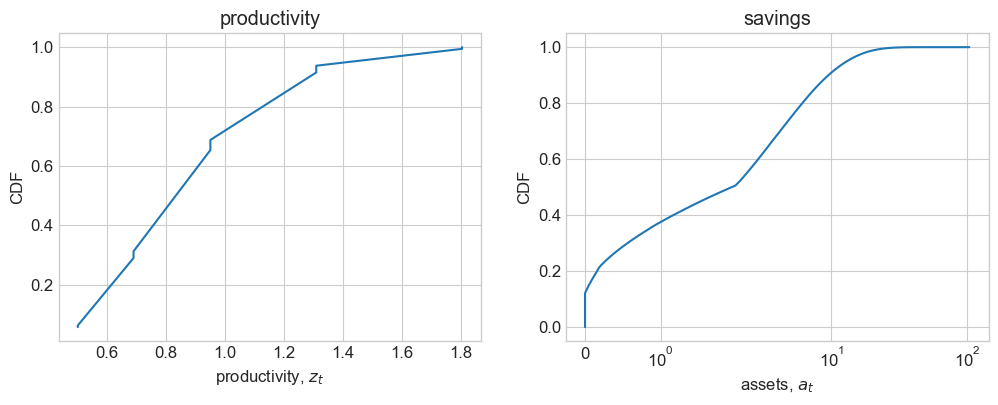

In [201]:
def plot_dist(model):
    par = model.par
    ss = model.ss
    fig = plt.figure(figsize=(12,4),dpi=100)

    # a. income
    ax = fig.add_subplot(1,2,1)
    ax.set_title('productivity')
    
    # Imperfect  but also unimportant
    ax.plot(par.s_grid,np.cumsum(np.sum(ss.D,axis=(0,2))))
    
    ax.set_xlabel('productivity, $z_{t}$')
    ax.set_ylabel('CDF')

    # b. assets
    ax = fig.add_subplot(1,2,2)
    ax.set_title('savings')
    ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete')
    ax.set_xlabel('assets, $a_{t}$')
    ax.set_ylabel('CDF')
    ax.set_xscale('symlog')
plot_dist(model)

### Model with $\kappa$ = 0

In [202]:
model_nok = model.copy()
model_nok.par.kappa = 0.

In [203]:
model_nok.find_ss(do_print=True)

### step 1: broad search ###

implied ss.r = -0.0900
implied ss.w = 3.0071
household problem in ss solved in 0.0 secs [42 iterations]
household problem in ss simulated in 0.0 secs [2 iterations]
implied ss.C_hh = 3.0071
implied ss.A_hh = 0.0000
clearing_A = -128.87634804

implied ss.r = -0.0756
implied ss.w = 2.0502
household problem in ss solved in 0.0 secs [51 iterations]
household problem in ss simulated in 0.0 secs [2 iterations]
implied ss.C_hh = 2.0502
implied ss.A_hh = 0.0000
clearing_A = -35.94430734

implied ss.r = -0.0611
implied ss.w = 1.6802
household problem in ss solved in 0.0 secs [70 iterations]
household problem in ss simulated in 0.0 secs [2 iterations]
implied ss.C_hh = 1.6802
implied ss.A_hh = 0.0000
clearing_A = -18.51677349

implied ss.r = -0.0467
implied ss.w = 1.4675
household problem in ss solved in 0.1 secs [108 iterations]
household problem in ss simulated in 0.0 secs [66 iterations]
implied ss.C_hh = 1.4674
implied ss.A_hh = 0.0017
clearing_A = -11.79075562


In [204]:
model_nok.ss.A

3.4910432119934063

In [205]:
model.ss.A

3.71463149258426

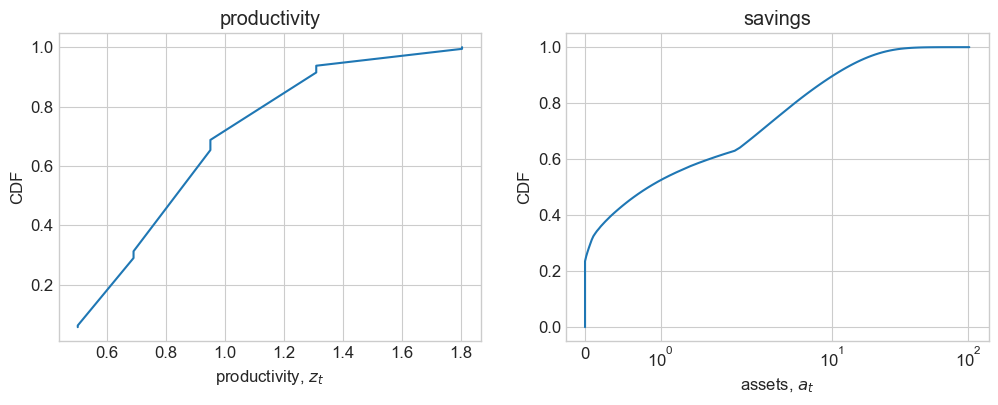

In [206]:
plot_dist(model_nok)

## Model with $\sigma_{\beta}=0$

In [207]:
model_nosb =HANCModelClass(name='The one beta to rule them all')
model_nosb.par.Nfix = 1

In [208]:
model_nosb.find_ss(do_print=True)

### step 1: broad search ###

implied ss.r = -0.0900
implied ss.w = 3.0071
household problem in ss solved in 1.6 secs [112 iterations]
household problem in ss simulated in 0.0 secs [100 iterations]
implied ss.C_hh = 2.8826
implied ss.A_hh = 1.3835
clearing_A = -127.49281118

implied ss.r = -0.0756
implied ss.w = 2.0502
household problem in ss solved in 0.0 secs [117 iterations]
household problem in ss simulated in 0.0 secs [105 iterations]
implied ss.C_hh = 2.0132
implied ss.A_hh = 0.4891
clearing_A = -35.45523623

implied ss.r = -0.0611
implied ss.w = 1.6802
household problem in ss solved in 0.0 secs [128 iterations]
household problem in ss simulated in 1.4 secs [115 iterations]
implied ss.C_hh = 1.6599
implied ss.A_hh = 0.3334
clearing_A = -18.18335832

implied ss.r = -0.0467
implied ss.w = 1.4675
household problem in ss solved in 0.0 secs [143 iterations]
household problem in ss simulated in 0.0 secs [131 iterations]
implied ss.C_hh = 1.4530
implied ss.A_hh = 0.3104
clearing_A = -11

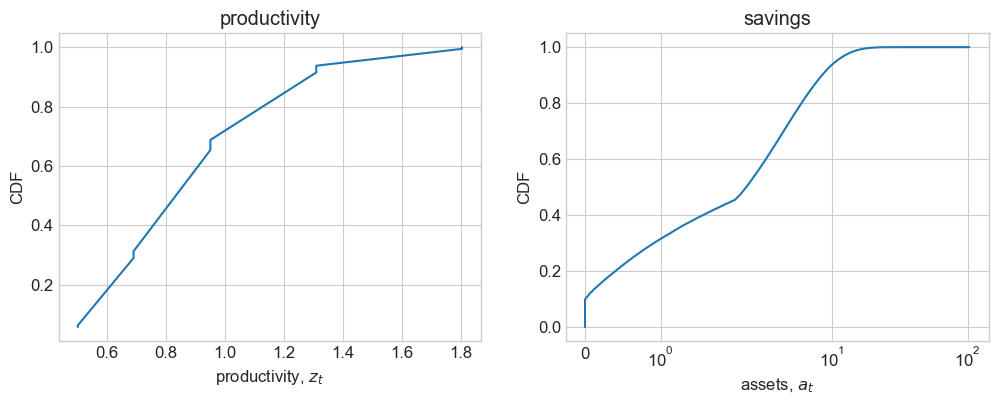

In [209]:
plot_dist(model_nosb)

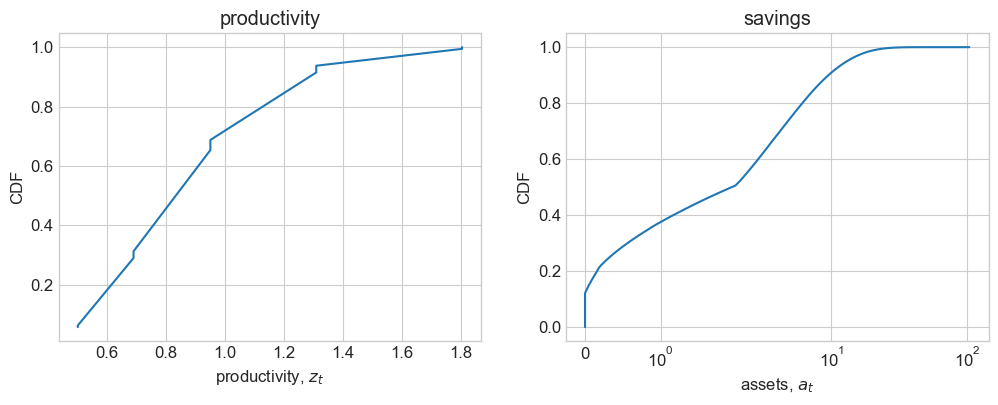

In [210]:
plot_dist(model)

In [211]:
model.ss.A

3.71463149258426

In [212]:
model_nosb.ss.A

3.5752334718672873

### $\sigma_{\chi}=0$

In [213]:
model_noschi =HANCModelClass(name='The one beta to rule them all')
model_noschi.par.sigma_chi = 0.

In [214]:
model_noschi.find_ss(do_print=True)

### step 1: broad search ###

implied ss.r = -0.0900
implied ss.w = 3.0071
household problem in ss solved in 1.9 secs [119 iterations]
household problem in ss simulated in 1.4 secs [101 iterations]
implied ss.C_hh = 2.8820
implied ss.A_hh = 1.3902
clearing_A = -127.48617924

implied ss.r = -0.0756
implied ss.w = 2.0502
household problem in ss solved in 0.1 secs [127 iterations]
household problem in ss simulated in 0.0 secs [105 iterations]
implied ss.C_hh = 2.0128
implied ss.A_hh = 0.4947
clearing_A = -35.44965629

implied ss.r = -0.0611
implied ss.w = 1.6802
household problem in ss solved in 0.1 secs [139 iterations]
household problem in ss simulated in 0.0 secs [117 iterations]
implied ss.C_hh = 1.6595
implied ss.A_hh = 0.3397
clearing_A = -18.17710067

implied ss.r = -0.0467
implied ss.w = 1.4675
household problem in ss solved in 0.1 secs [158 iterations]
household problem in ss simulated in 0.0 secs [135 iterations]
implied ss.C_hh = 1.4526
implied ss.A_hh = 0.3194
clearing_A = -11

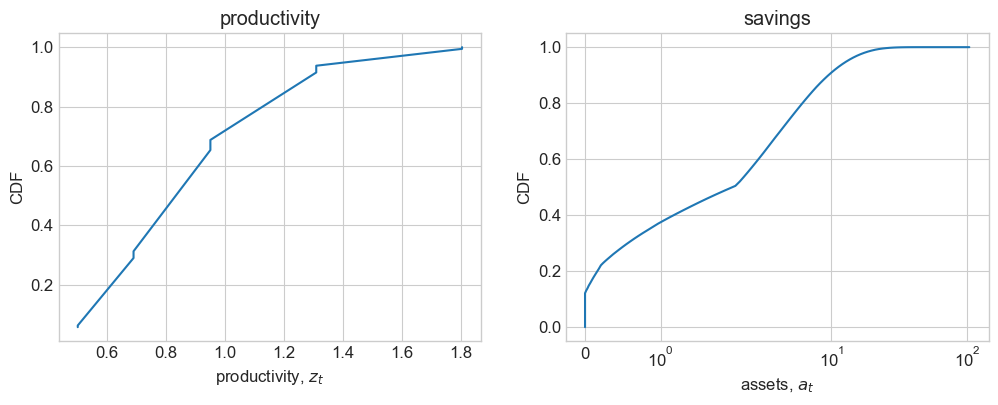

In [215]:
plot_dist(model_noschi)

In [216]:
model.ss.A

3.71463149258426

In [217]:
model_noschi.ss.A

3.7109989972705066

## Tables and plot discards 

In [ ]:

def make_row(model):
    '''
    Make a single row of the table for one parameter value
    '''
    ss = model.ss
    par = model.par 
    # stock of capital
    K = ss.K 

    # mean and std deviation of labor income
    mean_li = np.sum(ss.D*ss.w*par.s_grid[:,np.newaxis]) 
    std_li = np.sqrt( np.sum( ss.D*(ss.w*par.s_grid[:,np.newaxis]-mean_li) **2 ))

    
    # mean and  std deviation of capital income 
    rK_i = ss.rK *( 1 +  par.chi_grid* par.sigma_chi  - (1-par.chi_grid)* par.sigma_chi* par.pi_chi_obar/par.pi_chi_ubar ) 
    r_i = rK_i-par.delta

    mean_ci = np.sum( ss.D * (ss.a*r_i[np.newaxis,:,np.newaxis]) )
    std_ci = np.sqrt(np.sum(ss.D *( ss.a*r_i[np.newaxis,:,np.newaxis] -mean_ci)**2))

    # std deviation of savings
    Da = np.sum(ss.D,axis=(0,1))
    mean_a = np.sum(Da*par.a_grid)
    std_a = np.sqrt(np.sum(Da*(par.a_grid-mean_a)**2))

    # Skeewness of savings
    skeew_a = np.sum(Da * ((par.a_grid-mean_a)/std_a)**3  )

    return [K, mean_li, std_li, mean_ci, std_ci, std_a, skeew_a]



# IRFS 

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.3 secs
household problem simulated along transition in 0.0 secs



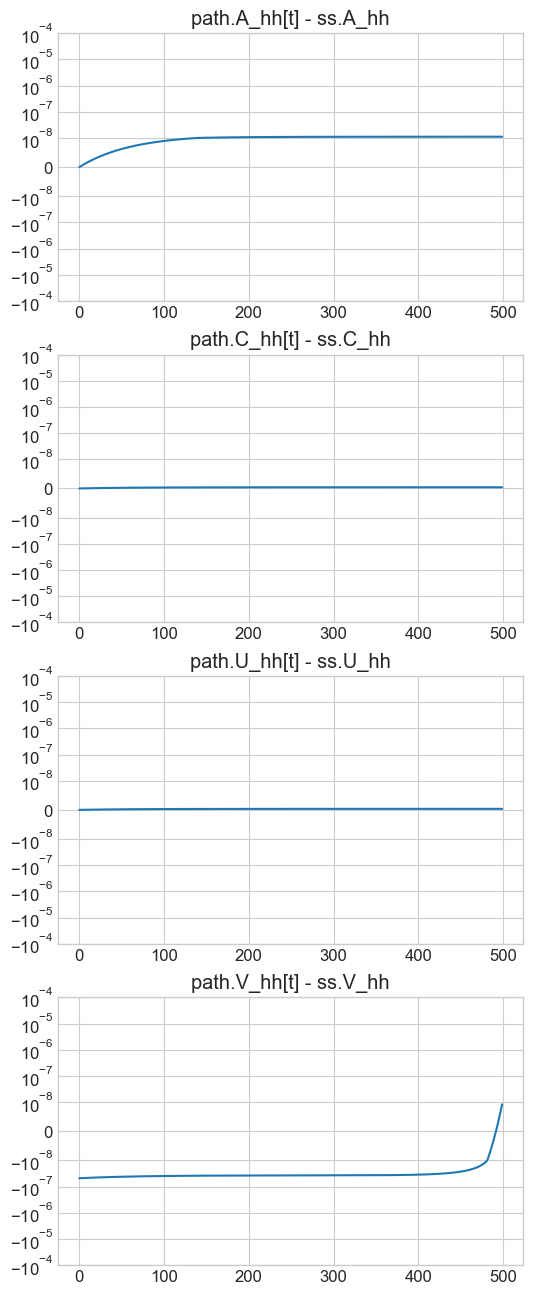

In [218]:
model.test_hh_path()

In [219]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
alpha          : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 =  2.4e-14, max abs.  1.1e-08
clearing_Y     : t0 =  6.9e-15, max abs.  4.1e-10
Gamma          : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 =  0.0e+00, max abs.  0.0e+00
r              : t0 =  0.0e+00, max abs.  0.0e+00
rK             : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  0.0e+00, max abs.  0.0e+00
Y              : t0 =  0.0e+00, max abs.  0.0e+00
A_hh           : t0 =  6.7e-15, max abs.  1.1e-08
C_hh           : t0 = -6.9e-15, max abs.  4.1e-10
U_hh           : t0 = -2.9e-15, max abs.  3.4e-10
V_hh           : t0 = -4.8e-08, max abs.  4.8e-08

absolute value (potential targets):


note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 0.7 secs]
finding Jacobian wrt. rK             : 0 125 250 375 [computed in 0.7 secs]
finding Jacobian wrt. w              : 0 125 250 375 [computed in 0.7 secs]
household Jacobian computed in 2.3 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for rK              in 0.4 secs
curly_Y and curly_D calculated for w               in 0.4 secs
curly_E calculated in 0.3 secs
builiding blocks combined in 0.1 secs
household Jacobian computed in 1.2 secs

A_hh:
 rK             : cond = 2.1e+02 [mean =  6.7e-01]
 w              : cond = 2.2e+01 [mean =  1.1e-02]

C_hh:
 rK             : cond = 4.2e+01 [mean =  1.9e-02]
 w              : cond = 1.6e+01 [mean =  2.2e-03]

U_hh:
 rK             : cond = 5.0e+01 [mean =  1.9e-02]
 w              : cond = 6.0e+00 [mean =  2.0e-03]

V_hh:
 rK        

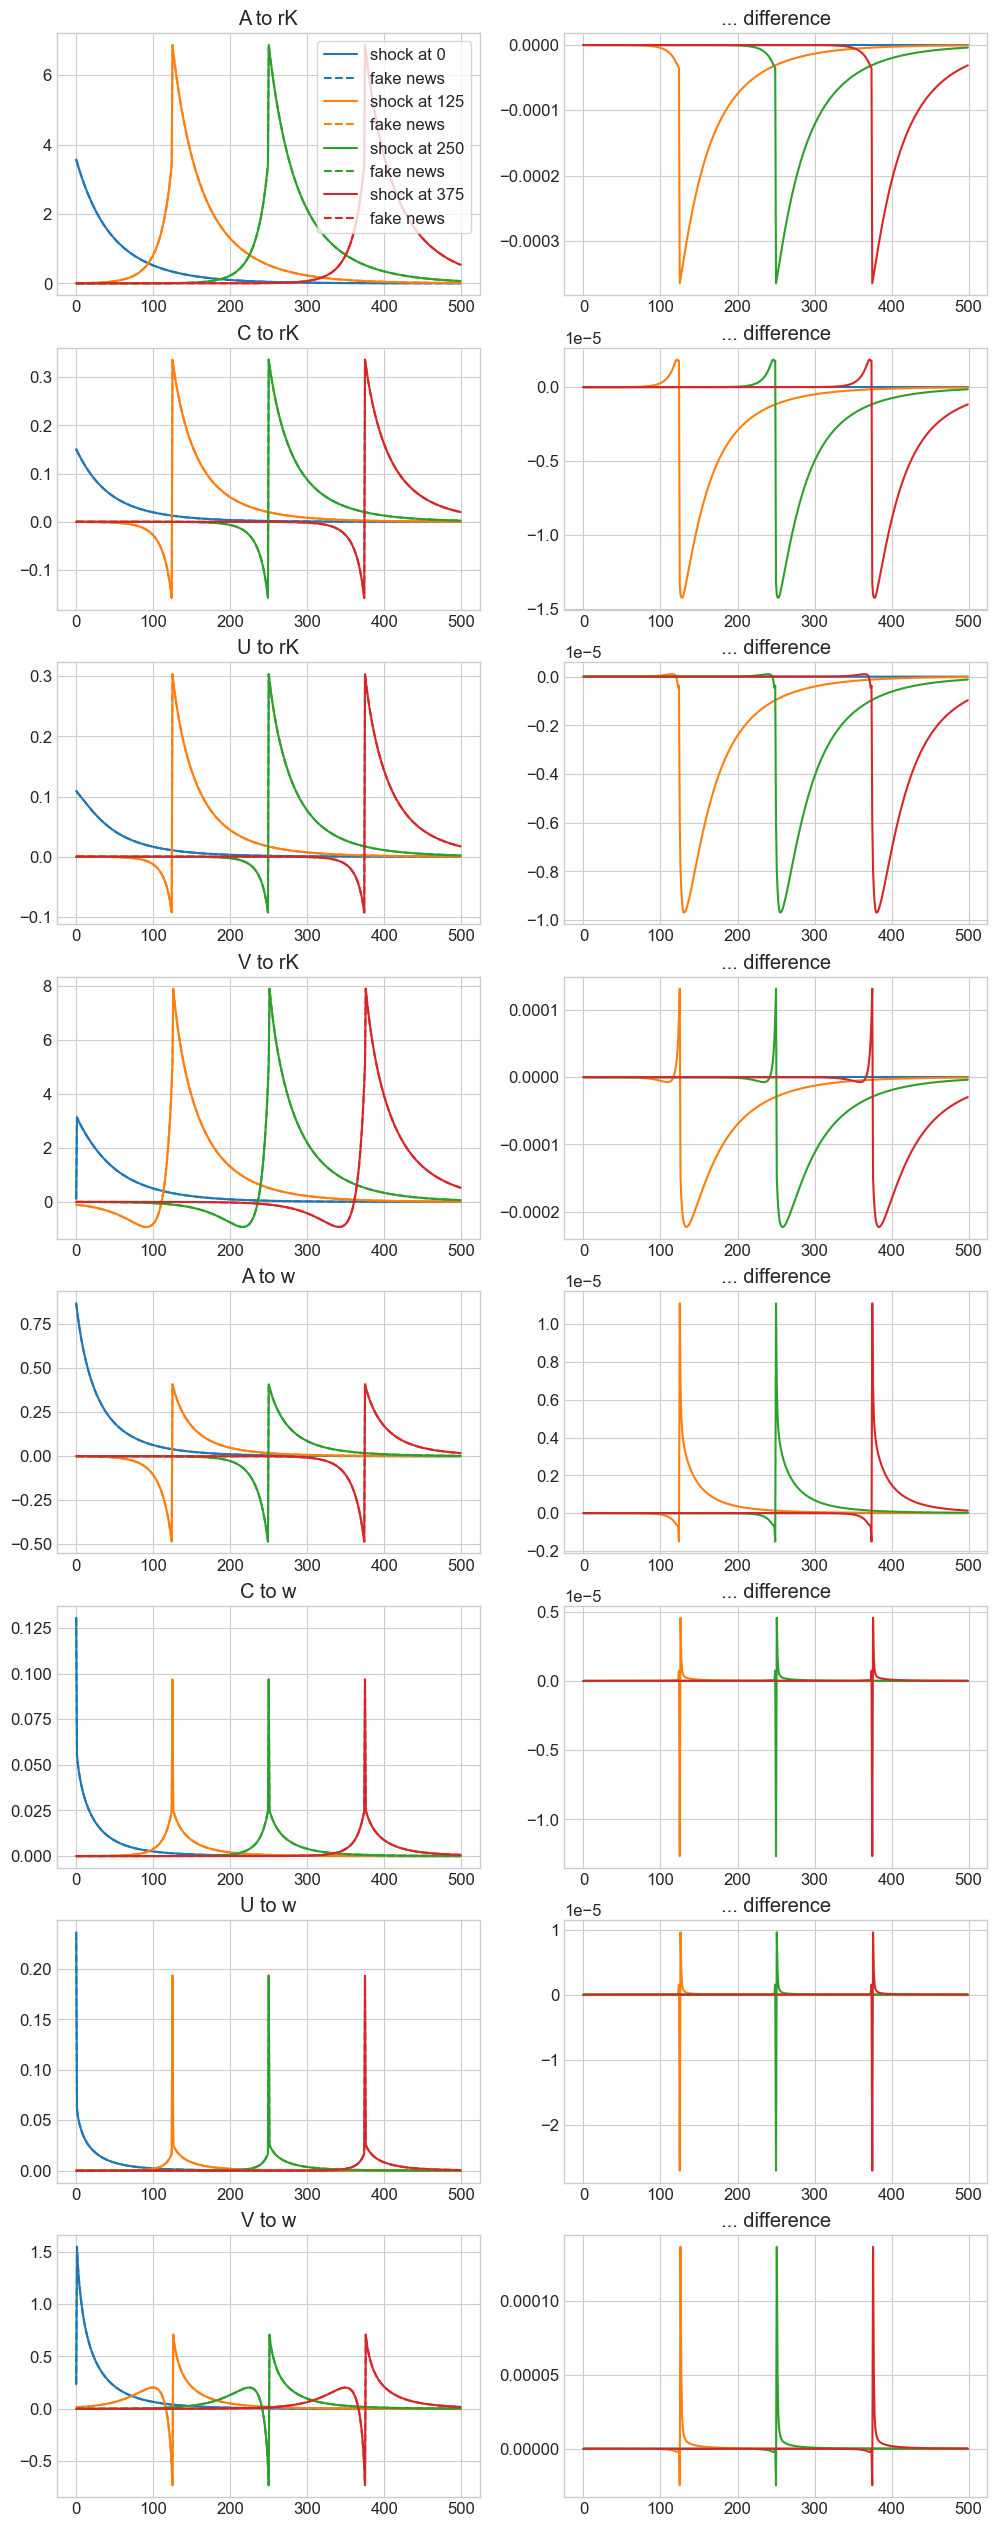

In [220]:
model.test_jacs()

In [225]:
model.compute_jacs(do_print=True) # if skip_shocks = True the full Jacobians to shocks are  not computed

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for rK              in 0.7 secs
curly_Y and curly_D calculated for w               in 0.7 secs
curly_E calculated in 0.4 secs
builiding blocks combined in 0.2 secs
household Jacobian computed in 2.0 secs

full Jacobians:
full Jacobian to unknowns computed in 0.5 secs [in evaluate_path(): 0.2 secs]
full Jacobian to shocks computed in 0.5 secs [in evaluate_path(): 0.2 secs]


In [222]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.90e-01
 it =   1 -> max. abs. error = 2.94e-03
 it =   2 -> max. abs. error = 5.15e-05
 it =   3 -> max. abs. error = 9.33e-08
 it =   4 -> max. abs. error = 5.11e-10
 it =   5 -> max. abs. error = 4.58e-13

transition path found in 3.0 secs


### shocks ###


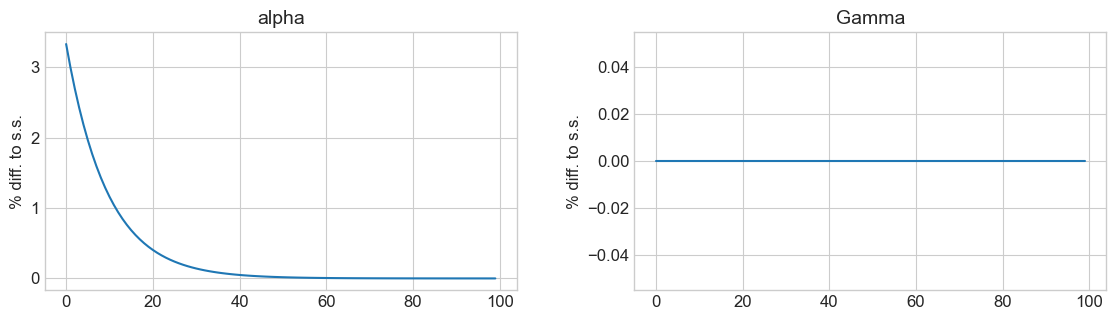


### varnames ###


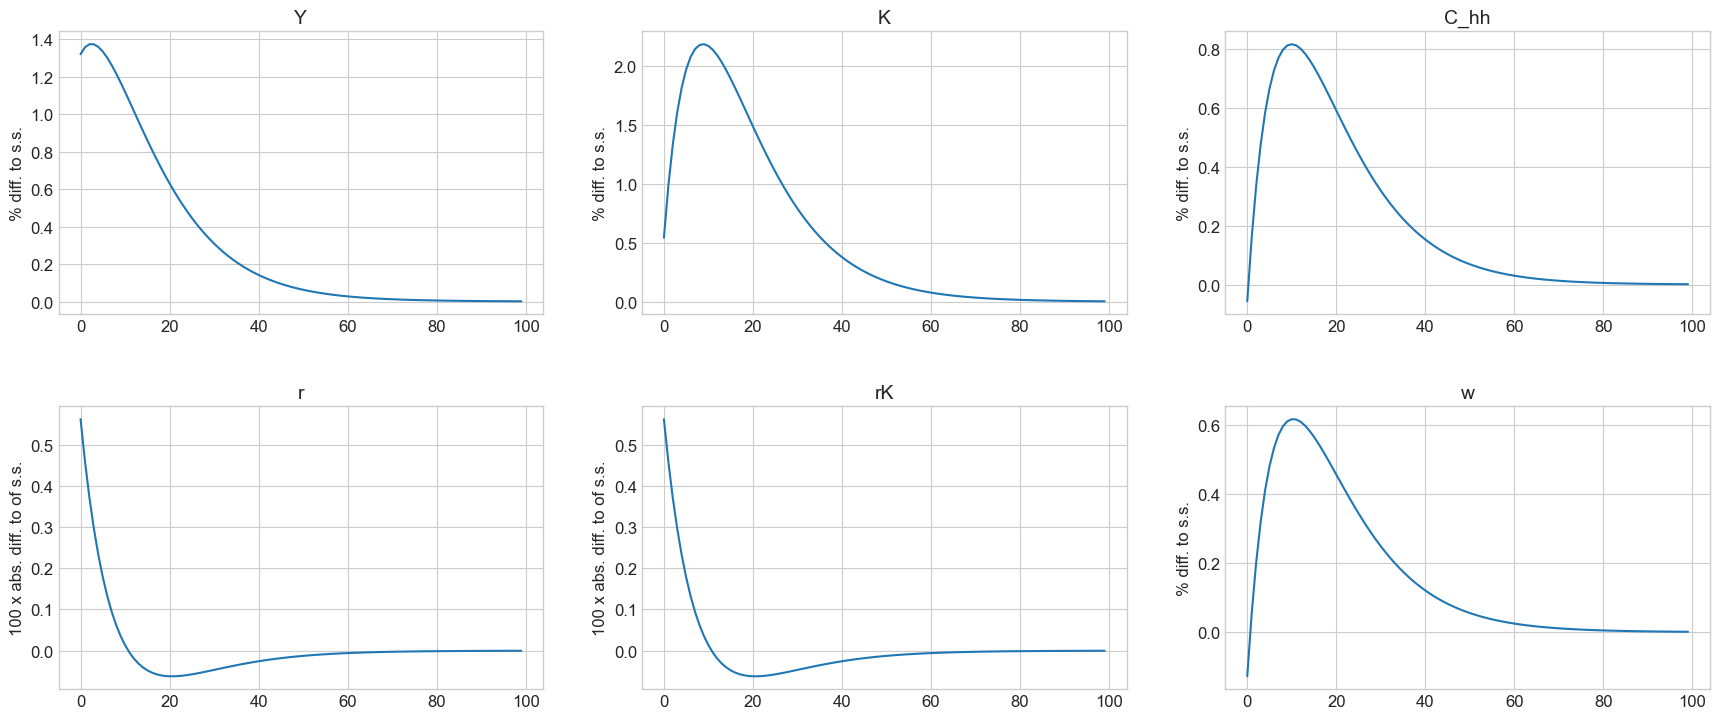


### tagets ###


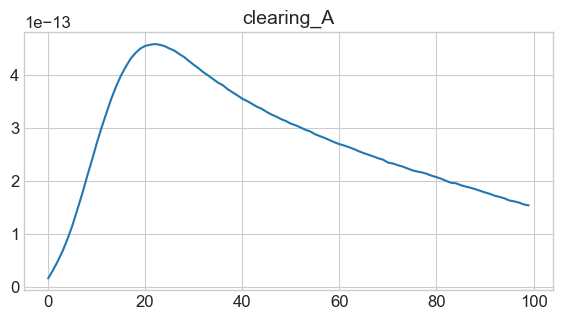

In [223]:
paths = ['Y','K','C_hh','r','rK','w']
abs_diff = ['r','rK']
facs = {'r':100,'rK':100}
model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,lvl_value=['clearing_A'],ncols=3,T_max=100)

In [224]:
path.clearing_A.max()

4.583000645652646e-13